In [21]:
from multiprocessing import Pool
import numpy as np
from graph import Circle, ErdosRenyi, RandomRegular, GraphByDegrees
from viz import draw_data
from utils import Timer, partition
from engine_mono import fun_mono
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>

In [2]:
def calc(fun_name, alphas, bs, graphs, T, init_type='01', pool_size=32):
    pool = Pool(pool_size)
    res = []
    timer = Timer()
    
    cur = 0
    
    for graph in graphs:
        local_timer = Timer()
        
        if fun_name == 'fun':
            res.append(pool.map(fun, [(graph, b, alpha, T, init_type) for b in bs for alpha in alphas]))
        elif fun_name == 'mono':
            res.append(pool.map(fun_mono, [(graph, b, alpha, T, init_type) for b in bs for alpha in alphas]))
        else:
            raise Exception(f'dont know fun name {fun_name}!')
        
        t = local_timer.measure()
        cur += 1
        rem = len(graphs) - cur
        print(f'#{cur} passed in {local_timer.measure()},  projected end in {timer.measure() / cur * rem / 60} minutes', flush=True)
        
    timer.print_elapsed()
    return np.array(res)

In [3]:
def plot_mean_and_std(bs, data, last):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

In [4]:
def plot_avg_deg_distribuion(graphs, max_deg=20):
    s = [0] * max_deg
    for graph in graphs:
        for d, cnt in graph.degrees().items():
            if d < max_deg:
                s[d] += cnt
    s = np.array(s)
    s = s / sum(s)
    #for i in range(1, len(s)):
    #    s[i] += s[i - 1]
    plt.scatter(np.arange(len(s)), s, c='red')

In [14]:
def plot_means(bs, data, last, title, show_data=True):
    fig, ax = plt.subplots()
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    if show_data:
        for t in cur:
            ax.scatter(bs, t, s=1, alpha=.05, c='red')
        
    cur = np.apply_along_axis(np.mean, 0, cur)
    ax.plot(bs, cur, '-')
    ax.set_title(title)
    plt.show()

In [6]:
def plot_individual(data, prob, title):
    fig, ax = plt.subplots()
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if random.uniform(0, 1) < prob:
                ax.plot(data[i][j])
    ax.set_title(title)
    plt.show()

In [7]:
graphs = Pool(32).map(GraphByDegrees, [{2: 300, 3: 300} for _ in range(500)])

Process ForkPoolWorker-28:
Process ForkPoolWorker-3:
Process ForkPoolWorker-5:
Process ForkPoolWorker-25:
Process ForkPoolWorker-30:
Process ForkPoolWorker-18:
Process ForkPoolWorker-4:
Process ForkPoolWorker-7:
Process ForkPoolWorker-32:
Process ForkPoolWorker-27:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Process ForkPoolWorker-2:
Process ForkPoolWorker-11:
Process ForkPoolWorker-16:
Process ForkPoolWorker-21:
Process ForkPoolWorker-22:
Process ForkPoolWorker-13:
Process ForkPoolWorker-20:
Process ForkPoolWorker-24:
Process ForkPoolWorker-31:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


In [12]:
res_fun = calc('fun', [.1], partition(0, 10, 256), graphs, 400)

#1 passed in 21.871863842010498,  projected end in 181.9012666543325 minutes
#2 passed in 22.090736627578735,  projected end in 182.45345743894578 minutes
#3 passed in 21.92819881439209,  projected end in 181.93973737425273 minutes
#4 passed in 22.436143398284912,  projected end in 182.54988848368328 minutes
#5 passed in 22.066311836242676,  projected end in 182.15615869760512 minutes
#6 passed in 22.023704767227173,  projected end in 181.71305651002461 minutes
#7 passed in 22.05370306968689,  projected end in 181.3342055349123 minutes
#8 passed in 22.177813291549683,  projected end in 181.07855238318444 minutes
#9 passed in 21.922118425369263,  projected end in 180.56519410433592 minutes
#10 passed in 22.070195198059082,  projected end in 180.20224882364272 minutes
#11 passed in 22.456566333770752,  projected end in 180.124747106162 minutes
#12 passed in 22.032216787338257,  projected end in 179.71018392244974 minutes
#13 passed in 21.961214542388916,  projected end in 179.25856093412

#106 passed in 22.21841049194336,  projected end in 145.49635530132917 minutes
#107 passed in 21.969324827194214,  projected end in 145.11565118370768 minutes
#108 passed in 22.405010223388672,  projected end in 144.76158096466537 minutes
#109 passed in 22.094091653823853,  projected end in 144.38856041402263 minutes
#110 passed in 22.045001745224,  projected end in 144.012721090967 minutes
#111 passed in 22.152710914611816,  projected end in 143.64332486437604 minutes
#112 passed in 21.90173888206482,  projected end in 143.2594515430076 minutes
#113 passed in 21.994282722473145,  projected end in 142.8811834817439 minutes
#114 passed in 22.11636447906494,  projected end in 142.5100066870974 minutes
#115 passed in 22.25334143638611,  projected end in 142.14652091489322 minutes
#116 passed in 22.780739307403564,  projected end in 141.81200804874817 minutes
#117 passed in 22.034780502319336,  projected end in 141.43601943943912 minutes
#118 passed in 22.394726991653442,  projected end in

#210 passed in 21.954554796218872,  projected end in 107.19439122165952 minutes
#211 passed in 22.23945188522339,  projected end in 106.82617543395284 minutes
#212 passed in 21.91132402420044,  projected end in 106.45050314237486 minutes
#213 passed in 22.195799827575684,  projected end in 106.0813191950601 minutes
#214 passed in 22.168921947479248,  projected end in 105.71152761075356 minutes
#215 passed in 22.02627682685852,  projected end in 105.33858960367913 minutes
#216 passed in 22.138442039489746,  projected end in 104.96816656493847 minutes
#217 passed in 21.961952447891235,  projected end in 104.59391931798967 minutes
#218 passed in 21.98494815826416,  projected end in 104.22024045001476 minutes
#219 passed in 22.391133069992065,  projected end in 103.85531408099096 minutes
#220 passed in 22.025777339935303,  projected end in 103.48256225730434 minutes
#221 passed in 22.124886989593506,  projected end in 103.1119492361988 minutes
#222 passed in 22.21096658706665,  projected e

#315 passed in 22.02727723121643,  projected end in 68.36837778034665 minutes
#316 passed in 22.14448857307434,  projected end in 67.99854471250929 minutes
#317 passed in 21.962198495864868,  projected end in 67.62696196318424 minutes
#318 passed in 21.778427124023438,  projected end in 67.25366156601056 minutes
#319 passed in 22.208726167678833,  projected end in 66.88449562992297 minutes
#320 passed in 22.197014331817627,  projected end in 66.51521354243158 minutes
#321 passed in 22.620479345321655,  projected end in 66.14986286483945 minutes
#322 passed in 22.290245532989502,  projected end in 65.78139641289879 minutes
#323 passed in 21.917179107666016,  projected end in 65.40950337604103 minutes
#324 passed in 22.38986587524414,  projected end in 65.04193131423291 minutes
#325 passed in 22.09576678276062,  projected end in 64.67168594721036 minutes
#326 passed in 21.98837661743164,  projected end in 64.30049743827867 minutes
#327 passed in 22.294292211532593,  projected end in 63.9

#419 passed in 22.28487205505371,  projected end in 29.960570847817426 minutes
#420 passed in 22.018380165100098,  projected end in 29.590135991384113 minutes
#421 passed in 22.03981876373291,  projected end in 29.219784118887553 minutes
#422 passed in 22.164697408676147,  projected end in 28.849833056486048 minutes
#423 passed in 21.937896728515625,  projected end in 28.479194143374574 minutes
#424 passed in 22.250120401382446,  projected end in 28.109511719897107 minutes
#425 passed in 22.319507360458374,  projected end in 27.74002783649108 minutes
#426 passed in 22.120677709579468,  projected end in 27.369956545501434 minutes
#427 passed in 22.28818392753601,  projected end in 27.000369316092886 minutes
#428 passed in 21.935831308364868,  projected end in 26.62978493587993 minutes
#429 passed in 22.170011520385742,  projected end in 26.25986963464201 minutes
#430 passed in 22.131240129470825,  projected end in 25.88985114384067 minutes
#431 passed in 21.849111795425415,  projected e

Process ForkPoolWorker-139:
Process ForkPoolWorker-138:
Process ForkPoolWorker-135:
Process ForkPoolWorker-148:
Process ForkPoolWorker-147:
Process ForkPoolWorker-132:
Process ForkPoolWorker-155:
Process ForkPoolWorker-159:
Process ForkPoolWorker-146:
Process ForkPoolWorker-129:
Process ForkPoolWorker-152:
Process ForkPoolWorker-136:
Process ForkPoolWorker-142:
Process ForkPoolWorker-131:
Process ForkPoolWorker-133:
Process ForkPoolWorker-154:
Process ForkPoolWorker-158:
Process ForkPoolWorker-150:
Process ForkPoolWorker-144:
Process ForkPoolWorker-157:
Process ForkPoolWorker-134:
Process ForkPoolWorker-151:
Process ForkPoolWorker-160:
Process ForkPoolWorker-143:
Process ForkPoolWorker-137:
Process ForkPoolWorker-149:
Process ForkPoolWorker-130:
Process ForkPoolWorker-140:
Process ForkPoolWorker-156:
Process ForkPoolWorker-141:
Process ForkPoolWorker-145:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call

In [11]:
res_mono = calc('mono', [.1], partition(0, 10, 256), graphs, 200)

#1 passed in 38.876707792282104,  projected end in 323.32490533590317 minutes
#2 passed in 38.87827181816101,  projected end in 322.69134505987165 minutes
#3 passed in 39.24575161933899,  projected end in 323.0599864138497 minutes
#4 passed in 38.953564405441284,  projected end in 322.31310429573057 minutes
#5 passed in 38.894397258758545,  projected end in 321.50754940509796 minutes
#6 passed in 39.089009046554565,  projected end in 321.0217454897033 minutes
#7 passed in 39.43871879577637,  projected end in 320.89895547798704 minutes
#8 passed in 39.212233543395996,  projected end in 320.4103134453297 minutes
#9 passed in 38.9684112071991,  projected end in 319.6635193016794 minutes
#10 passed in 38.907612323760986,  projected end in 318.8864288210869 minutes
#11 passed in 38.9844388961792,  projected end in 318.18957850499584 minutes
#12 passed in 38.82604646682739,  projected end in 317.39336467848887 minutes
#13 passed in 38.92799997329712,  projected end in 316.68361921310424 minu

#107 passed in 39.29981184005737,  projected end in 255.42787870324662 minutes
#108 passed in 39.71080684661865,  projected end in 254.82118679505805 minutes
#109 passed in 39.521244049072266,  projected end in 254.20214842714665 minutes
#110 passed in 38.67890453338623,  projected end in 253.5326132676818 minutes
#111 passed in 38.78829836845398,  projected end in 252.86991780112098 minutes
#112 passed in 39.371663331985474,  projected end in 252.2411969169265 minutes
#113 passed in 39.27893257141113,  projected end in 251.6066928961636 minutes
#114 passed in 38.907875061035156,  projected end in 250.95090236329193 minutes
#115 passed in 39.22504997253418,  projected end in 250.31292840933457 minutes
#116 passed in 38.756932973861694,  projected end in 249.64885655107167 minutes
#117 passed in 39.43390154838562,  projected end in 249.02202618278332 minutes
#118 passed in 38.80479073524475,  projected end in 248.36074075415982 minutes
#119 passed in 38.56533122062683,  projected end in

#211 passed in 38.45378518104553,  projected end in 187.90472919859968 minutes
#212 passed in 38.980462074279785,  projected end in 187.25386058159592 minutes
#213 passed in 39.01416301727295,  projected end in 186.60375560158295 minutes
#214 passed in 38.47345232963562,  projected end in 185.94160676741524 minutes
#215 passed in 38.94357967376709,  projected end in 185.2900439944378 minutes
#216 passed in 39.268757820129395,  projected end in 184.6456233795778 minutes
#217 passed in 38.7855441570282,  projected end in 183.99060663010488 minutes
#218 passed in 39.0229172706604,  projected end in 183.34079099445168 minutes
#219 passed in 38.723373889923096,  projected end in 182.6845605169257 minutes
#220 passed in 38.92060685157776,  projected end in 182.0326134371035 minutes
#221 passed in 38.81409549713135,  projected end in 181.37845304346732 minutes
#222 passed in 38.57935929298401,  projected end in 180.71946294554718 minutes
#223 passed in 39.12627387046814,  projected end in 180

#315 passed in 39.24177551269531,  projected end in 120.24255154908651 minutes
#316 passed in 39.01048922538757,  projected end in 119.59272468190655 minutes
#317 passed in 38.72958731651306,  projected end in 118.9401923893754 minutes
#318 passed in 38.98827075958252,  projected end in 118.29017372226316 minutes
#319 passed in 38.43257451057434,  projected end in 117.63489893367175 minutes
#320 passed in 39.21540284156799,  projected end in 116.98705745413899 minutes
#321 passed in 38.93173003196716,  projected end in 116.3365442179445 minutes
#322 passed in 38.600523233413696,  projected end in 115.68298739098616 minutes
#323 passed in 38.79792237281799,  projected end in 115.03129684891863 minutes
#324 passed in 38.90863275527954,  projected end in 114.3806410569713 minutes
#325 passed in 38.750104665756226,  projected end in 113.7285738052466 minutes
#326 passed in 39.14391279220581,  projected end in 113.0800484380839 minutes
#327 passed in 38.8053023815155,  projected end in 112.

#420 passed in 38.989644289016724,  projected end in 52.15817502036927 minutes
#421 passed in 38.825413942337036,  projected end in 51.50528327331407 minutes
#422 passed in 38.88437628746033,  projected end in 50.85260063494551 minutes
#423 passed in 38.70434784889221,  projected end in 50.19939353654852 minutes
#424 passed in 38.46450972557068,  projected end in 49.54550872156455 minutes
#425 passed in 38.70351552963257,  projected end in 48.89238641963286 minutes
#426 passed in 38.42101049423218,  projected end in 48.238484047891944 minutes
#427 passed in 38.94918918609619,  projected end in 47.5861504668002 minutes
#428 passed in 38.604597330093384,  projected end in 46.93286509023649 minutes
#429 passed in 39.198296546936035,  projected end in 46.28126339625274 minutes
#430 passed in 38.665321350097656,  projected end in 45.62820798297261 minutes
#431 passed in 39.10577964782715,  projected end in 44.97636755790622 minutes
#432 passed in 38.68658995628357,  projected end in 44.3234

Process ForkPoolWorker-128:
Process ForkPoolWorker-104:
Process ForkPoolWorker-109:
Process ForkPoolWorker-113:
Process ForkPoolWorker-97:
Process ForkPoolWorker-111:
Process ForkPoolWorker-125:
Process ForkPoolWorker-117:
Process ForkPoolWorker-102:
Process ForkPoolWorker-124:
Process ForkPoolWorker-106:
Process ForkPoolWorker-118:
Process ForkPoolWorker-101:
Process ForkPoolWorker-108:
Process ForkPoolWorker-110:
Process ForkPoolWorker-105:
Process ForkPoolWorker-121:
Process ForkPoolWorker-107:
Process ForkPoolWorker-122:
Process ForkPoolWorker-123:
Process ForkPoolWorker-114:
Process ForkPoolWorker-99:
Process ForkPoolWorker-100:
Traceback (most recent call last):
Process ForkPoolWorker-103:
Process ForkPoolWorker-127:
Process ForkPoolWorker-120:
Traceback (most recent call last):
Process ForkPoolWorker-126:
Traceback (most recent call last):
Process ForkPoolWorker-98:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-112:
Traceback (most 

<IPython.core.display.Javascript object>


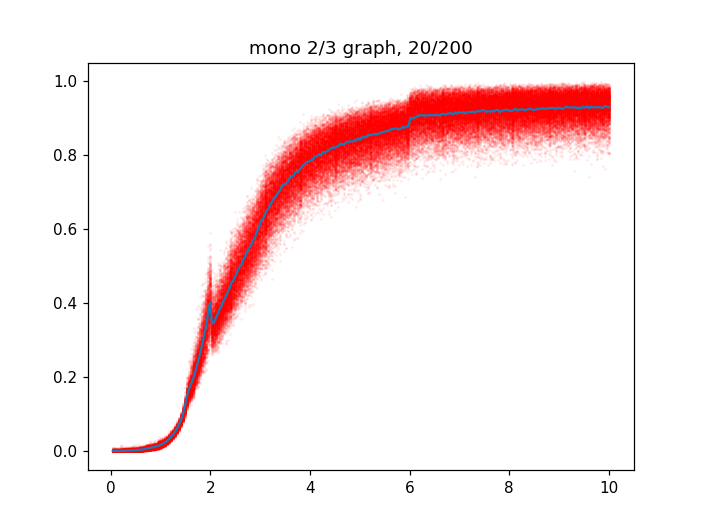

In [49]:
plot_means(partition(0, 10, 256), res_mono, 20, 'mono 2/3 graph, 20/200', show_data=True)

<IPython.core.display.Javascript object>


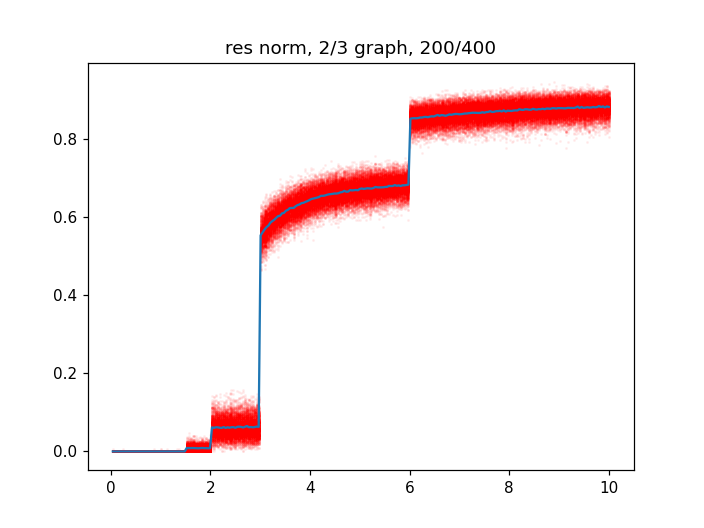

In [19]:
plot_means(partition(0, 10, 256), res_fun, 50, 'res norm, 2/3 graph, 200/400')

<IPython.core.display.Javascript object>


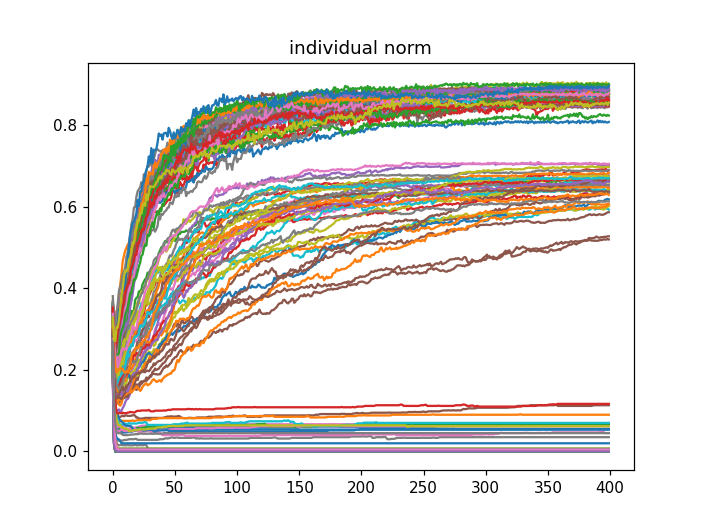

In [50]:
plot_individual(res_fun, .001, 'individual norm')

In [15]:
res50 = calc([.1], partition(0, 10, 256), graphs[:10], 1000)

#1 passed in 195.117267370224,  projected end in 29.267588889598848 minutes
#2 passed in 195.5690197944641,  projected end in 26.075868701934816 minutes
#3 passed in 194.418799161911,  projected end in 22.68219273487727 minutes
#4 passed in 194.29382181167603,  projected end in 19.429381823539735 minutes
#5 passed in 196.39784383773804,  projected end in 16.3664866288503 minutes
#6 passed in 195.674565076828,  projected end in 13.044970719019572 minutes
#7 passed in 197.76551795005798,  projected end in 9.88827567100525 minutes
#8 passed in 197.93334674835205,  projected end in 6.597778081893921 minutes
#9 passed in 198.49377059936523,  projected end in 3.308229446411133 minutes
#10 passed in 198.11224269866943,  projected end in 0.0 minutes
time elapsed = 1963.786752462387


<IPython.core.display.Javascript object>


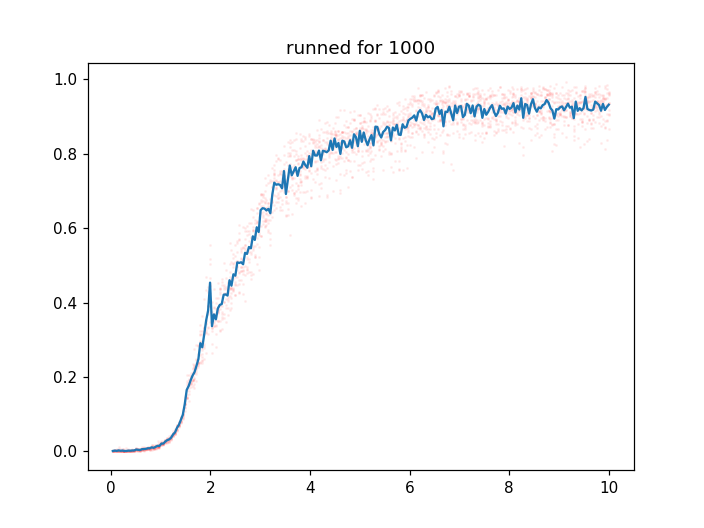

In [17]:
plot_means(partition(0, 10, 256), res50, 100, 'runned for 1000')

<IPython.core.display.Javascript object>


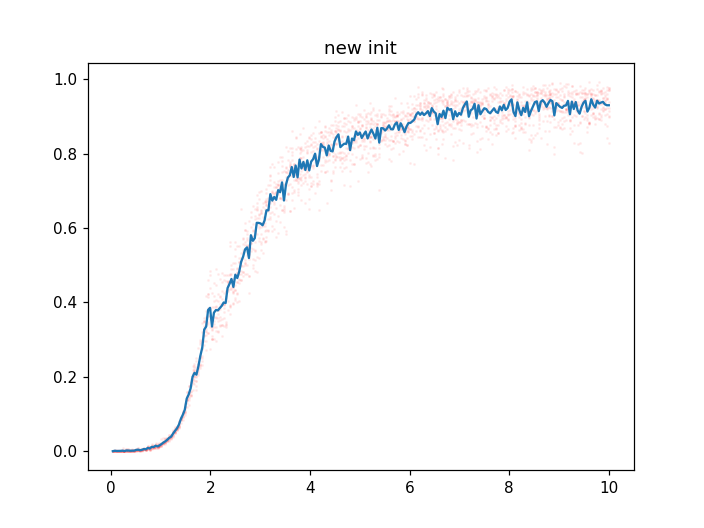

In [11]:
plot_means(partition(0, 10, 256), res50, 10, 'new init')

<IPython.core.display.Javascript object>


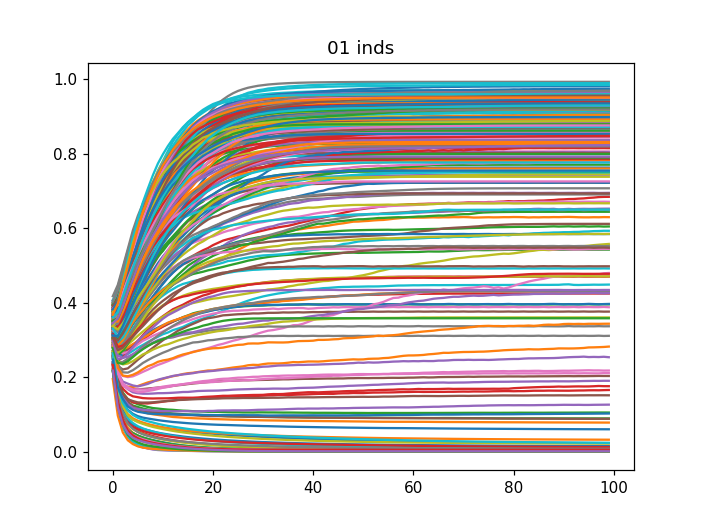

In [14]:
plot_individual(res50, .1, '01 inds')

<IPython.core.display.Javascript object>


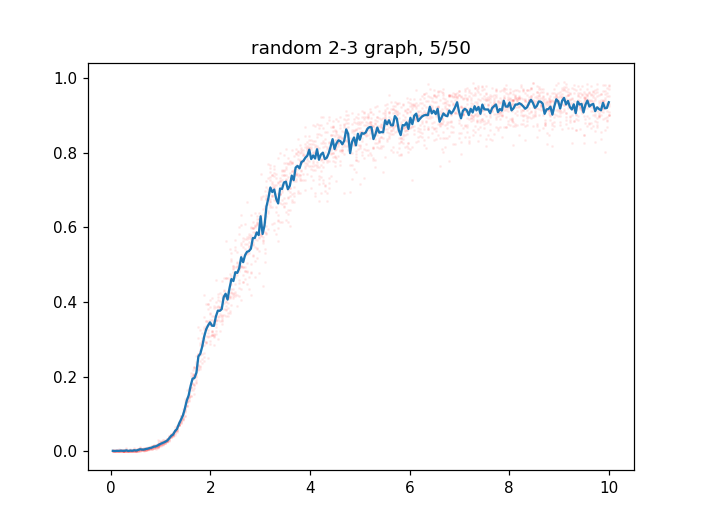

In [9]:
plot_means(partition(0, 10, 256), res50, 5, 'random 2-3 graph, 5/50')

In [21]:
res400 = calc([.1], partition(0, 10, 256), graphs, 100)

#1 passed in 23.196428775787354,  projected end in 154.25615940093994 minutes
#2 passed in 22.930899381637573,  projected end in 152.1082723458608 minutes
#3 passed in 22.857061862945557,  projected end in 151.23753566344578 minutes
#4 passed in 23.000515460968018,  projected end in 151.80337057113647 minutes
#5 passed in 22.63970112800598,  projected end in 149.04467084010443 minutes
#6 passed in 22.787375688552856,  projected end in 149.6370690425237 minutes
#7 passed in 23.221035480499268,  projected end in 152.09775584936142 minutes
#8 passed in 22.821695566177368,  projected end in 149.10171476999918 minutes
#9 passed in 22.94668984413147,  projected end in 149.53589463631312 minutes
#10 passed in 22.80503559112549,  projected end in 148.23269724845886 minutes
#11 passed in 22.980971813201904,  projected end in 148.9932712197304 minutes
#12 passed in 23.120015621185303,  projected end in 149.50940659840902 minutes
#13 passed in 23.201172828674316,  projected end in 149.64753860235

#106 passed in 23.807310581207275,  projected end in 116.655801987648 minutes
#107 passed in 23.332129955291748,  projected end in 113.93854931990306 minutes
#108 passed in 23.499800205230713,  projected end in 114.36566880544027 minutes
#109 passed in 22.855316162109375,  projected end in 110.84826372861862 minutes
#110 passed in 22.79848027229309,  projected end in 110.19263505935669 minutes
#111 passed in 22.92590832710266,  projected end in 110.4264354745547 minutes
#112 passed in 22.88442873954773,  projected end in 109.84523963928223 minutes
#113 passed in 23.039012908935547,  projected end in 110.20326244831085 minutes
#114 passed in 23.11033344268799,  projected end in 110.15923675696055 minutes
#115 passed in 22.91320013999939,  projected end in 108.83767914772034 minutes
#116 passed in 23.059772491455078,  projected end in 109.14957286516825 minutes
#117 passed in 22.94549298286438,  projected end in 108.22622053623199 minutes
#118 passed in 23.037901878356934,  projected end

#210 passed in 23.370392560958862,  projected end in 74.00623253981273 minutes
#211 passed in 22.881147861480713,  projected end in 72.07560374736786 minutes
#212 passed in 22.967007637023926,  projected end in 71.96327640215556 minutes
#213 passed in 23.062917232513428,  projected end in 71.87941348552704 minutes
#214 passed in 22.85448670387268,  projected end in 70.8488940000534 minutes
#215 passed in 23.082371473312378,  projected end in 71.17063361406326 minutes
#216 passed in 23.205093145370483,  projected end in 71.16227248509725 minutes
#217 passed in 22.81785225868225,  projected end in 69.59443702697754 minutes
#218 passed in 22.908272743225098,  projected end in 69.48841430346171 minutes
#219 passed in 22.75539469718933,  projected end in 68.6454291621844 minutes
#220 passed in 22.903687715530396,  projected end in 68.71105098724365 minutes
#221 passed in 23.075151920318604,  projected end in 68.84085140228271 minutes
#222 passed in 22.65947961807251,  projected end in 67.22

#315 passed in 23.08267045021057,  projected end in 32.700444062550865 minutes
#316 passed in 22.841838359832764,  projected end in 31.978567361831665 minutes
#317 passed in 22.93048882484436,  projected end in 31.72050360441208 minutes
#318 passed in 22.67789888381958,  projected end in 30.993122935295105 minutes
#319 passed in 22.6830952167511,  projected end in 30.622173392772673 minutes
#320 passed in 22.763238668441772,  projected end in 30.35097821553548 minutes
#321 passed in 22.660836458206177,  projected end in 29.836762038866677 minutes
#322 passed in 22.75783371925354,  projected end in 29.585178565979003 minutes
#323 passed in 22.948201179504395,  projected end in 29.45018600622813 minutes
#324 passed in 23.04041838645935,  projected end in 29.18452331225077 minutes
#325 passed in 23.101516008377075,  projected end in 28.876889646053314 minutes
#326 passed in 22.86342477798462,  projected end in 28.19821859995524 minutes
#327 passed in 22.9988112449646,  projected end in 27

In [17]:
res100 = calc([.1], partition(0, 10, 256), graphs, 100)

#1 passed in 22.922598838806152,  projected end in 37.82226408720017 minutes
#2 passed in 23.146514892578125,  projected end in 37.805967315038046 minutes
#3 passed in 23.030478477478027,  projected end in 37.23259993394216 minutes
#4 passed in 23.05238389968872,  projected end in 36.88380813598633 minutes
#5 passed in 22.988892078399658,  projected end in 36.39907270669937 minutes
#6 passed in 23.03788423538208,  projected end in 36.09267745812734 minutes
#7 passed in 22.861180305480957,  projected end in 35.43482429981232 minutes
#8 passed in 22.78886127471924,  projected end in 34.942913675308226 minutes
#9 passed in 23.878285884857178,  projected end in 36.215393749872845 minutes
#10 passed in 23.382768154144287,  projected end in 35.07414650917053 minutes
#11 passed in 23.055253267288208,  projected end in 34.19862037499745 minutes
#12 passed in 23.07573413848877,  projected end in 33.844403425852455 minutes
#13 passed in 22.70921540260315,  projected end in 32.92835680246353 minu

In [25]:
res500 = np.concatenate((res100, res400))

In [26]:
with open('res500.npy', 'wb') as f:
    np.save(f, res500)

<IPython.core.display.Javascript object>


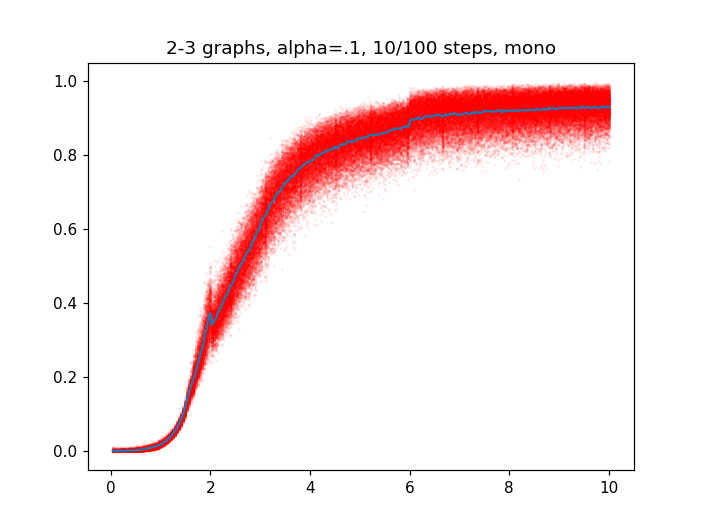

In [24]:
plot_means(partition(0, 10, 256), np.concatenate((res400, res100)), 10, '2-3 graphs, alpha=.1, 10/100 steps, mono')

In [9]:
res10 = calc([.1], partition(0, 10, 256), graphs, 100)

#1 passed in 22.672497034072876,  projected end in 3.400872051715851 minutes
#2 passed in 22.544068574905396,  projected end in 3.005875301361084 minutes
#3 passed in 22.738921880722046,  projected end in 2.652873718738556 minutes
#4 passed in 22.762951612472534,  projected end in 2.2762948274612427 minutes
#5 passed in 22.49528694152832,  projected end in 1.8746068874994914 minutes
#6 passed in 22.721961736679077,  projected end in 1.5147971630096435 minutes
#7 passed in 22.800381898880005,  projected end in 1.140018880367279 minutes
#8 passed in 22.69743824005127,  projected end in 0.7565811395645141 minutes
#9 passed in 22.633163928985596,  projected end in 0.3772193272908529 minutes
#10 passed in 22.56947088241577,  projected end in 0.0 minutes
time elapsed = 226.6477279663086


<IPython.core.display.Javascript object>


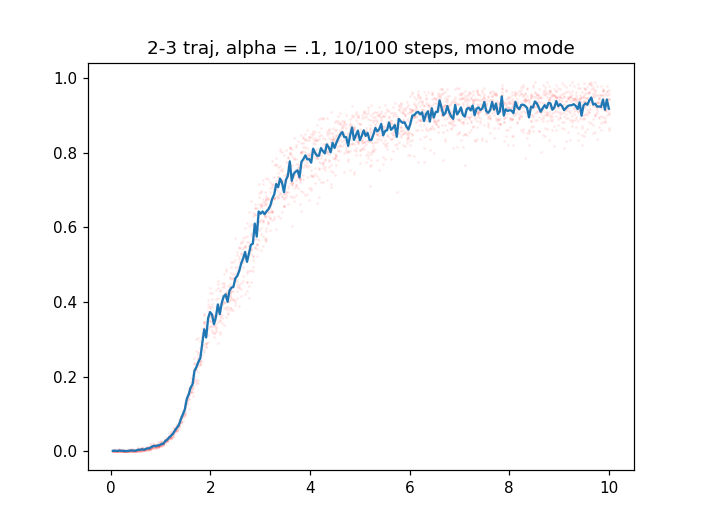

In [15]:
plot_means(partition(0, 10, 256), res10, 10, '2-3 traj, alpha = .1, 10/100 steps, mono mode')

<IPython.core.display.Javascript object>


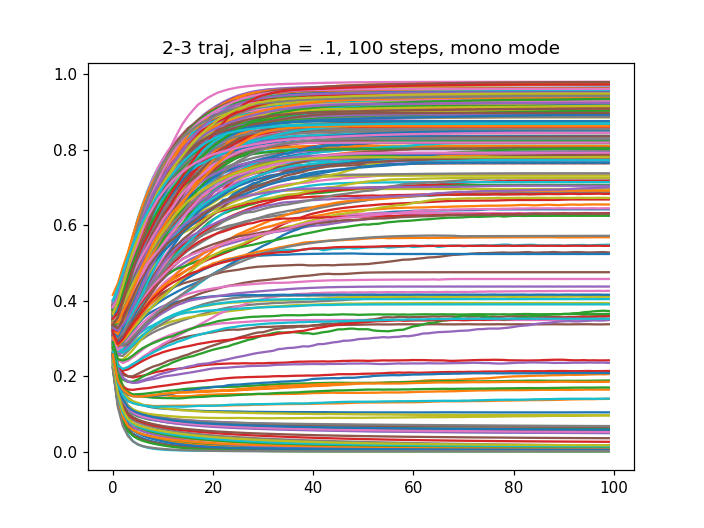

In [14]:
plot_individual(res10, .1, '2-3 traj, alpha = .1, 100 steps, mono mode')

<IPython.core.display.Javascript object>


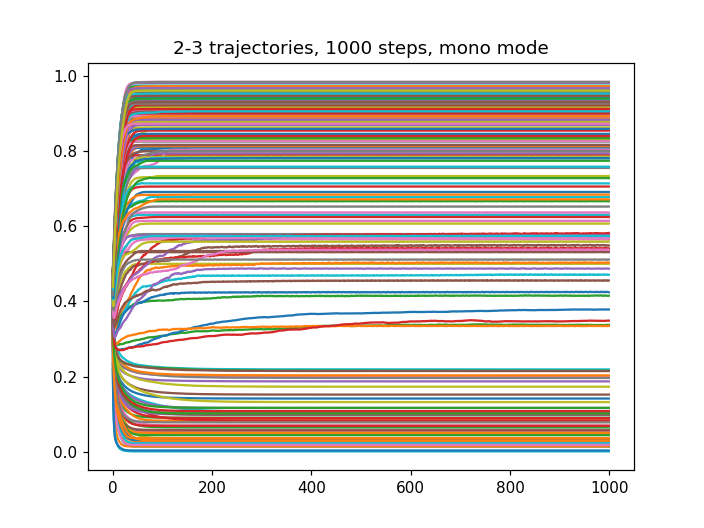

In [27]:
plot_individual(res, .1, '2-3 trajectories, 1000 steps, mono mode')

In [26]:
def get_er(x):
    return ErdosRenyi(1000, 4. / 1000.)

er_graphs = Pool(32).map(get_er, [_ for _ in range(500)])

In [36]:
res_er_mono = calc('mono', [.1], partition(0, 10, 256), er_graphs[:10], 500, '01')

#1 passed in 183.2747983932495,  projected end in 27.491225445270537 minutes
#2 passed in 181.6354854106903,  projected end in 24.327513535817463 minutes
#3 passed in 183.03815865516663,  projected end in 21.30924038887024 minutes
#4 passed in 182.14023303985596,  projected end in 18.252323693037035 minutes
#5 passed in 184.1529037952423,  projected end in 15.237447186311085 minutes
#6 passed in 185.36376643180847,  projected end in 12.21790574921502 minutes
#7 passed in 181.53985929489136,  projected end in 9.151088310991016 minutes
#8 passed in 182.4551386833191,  projected end in 6.098368532458941 minutes
#9 passed in 182.30236530303955,  projected end in 3.0479849219322204 minutes
#10 passed in 185.59153413772583,  projected end in 0.0 minutes
time elapsed = 1831.5053589344025


In [40]:
res_er_fun = calc('fun', [.1], partition(0, 10, 256), er_graphs[:50], 500, '01')

#1 passed in 64.71925735473633,  projected end in 52.85409775177638 minutes
#2 passed in 62.29024648666382,  projected end in 50.80471134185791 minutes
#3 passed in 62.1260826587677,  projected end in 49.38624917003843 minutes
#4 passed in 61.970452070236206,  projected end in 48.1294950624307 minutes
#5 passed in 63.61639094352722,  projected end in 47.2092188000679 minutes
#6 passed in 63.11419105529785,  projected end in 46.180823983086476 minutes
#7 passed in 62.41967988014221,  projected end in 45.07461102292651 minutes
#8 passed in 62.69593644142151,  projected end in 44.00903432071209 minutes
#9 passed in 63.31071209907532,  projected end in 42.99473138032136 minutes
#10 passed in 66.14128255844116,  projected end in 42.16094257036845 minutes
#11 passed in 62.74811005592346,  projected end in 41.0778242371299 minutes
#12 passed in 62.83736610412598,  projected end in 40.005628299050855 minutes
#13 passed in 65.82888698577881,  projected end in 39.07917505044203 minutes
#14 passe

<IPython.core.display.Javascript object>


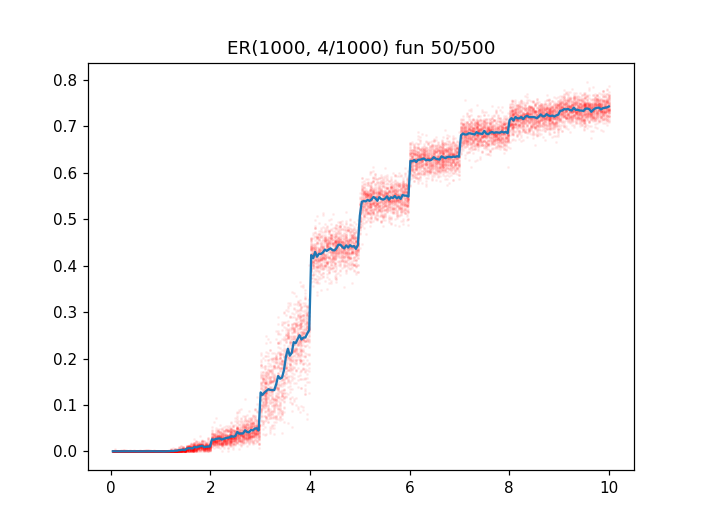

In [41]:
plot_means(partition(0, 10, 256), res_er_fun, 50, 'ER(1000, 4/1000) fun 50/500')

<IPython.core.display.Javascript object>


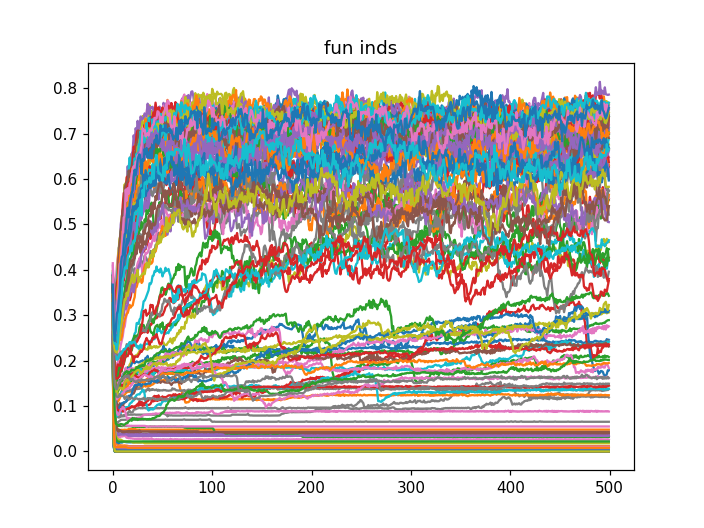

In [45]:
plot_individual(res_er_fun, .01, 'fun inds')

<IPython.core.display.Javascript object>


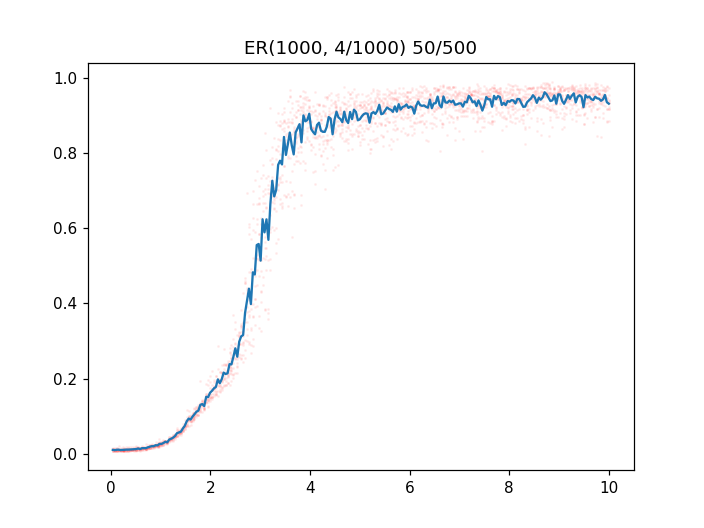

In [38]:
plot_means(partition(0, 10, 256), res_er_mono, 50, 'ER(1000, 4/1000) 50/500')

<IPython.core.display.Javascript object>


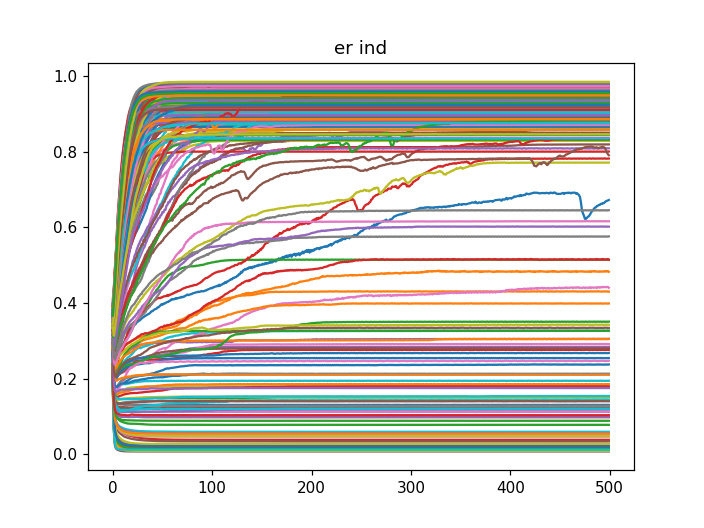

In [39]:
plot_individual(res_er_mono, .1, 'er ind')